In [92]:
import librosa
import numpy as np
import librosa.display
import librosa.decompose
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Audio


https://www.researchgate.net/publication/4156453_A_non-local_algorithm_for_image_denoising/link/0f317534c2cac194e4000000/download

In [120]:


# load exampels from all machines
d = {}

pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\pump\id_00\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\pump\id_00\abnormal\00000000.wav'    
d['pump'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\fan\id_00\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\fan\id_00\abnormal\00000000.wav'    
d['fan'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\slider\id_02\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\slider\id_02\abnormal\00000000.wav'    
d['slider'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\valve\id_06\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\valve\id_06\abnormal\00000000.wav'    
d['valve'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}

sr = d['pump']['n'][1]

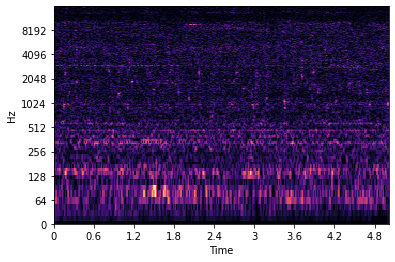

In [147]:
y =  d['pump']['n'][0][0]
S = np.abs(librosa.stft(y,n_fft=2048))
librosa.display.specshow(S, x_axis='time', y_axis='log',sr=sr*2)

In [148]:
nlm = librosa.decompose.nn_filter(S,aggregate=np.average)

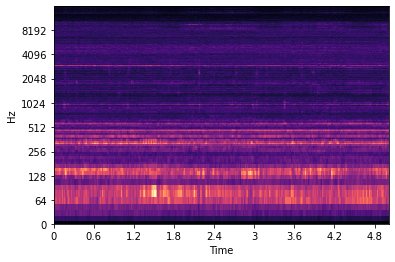

In [149]:
librosa.display.specshow(nlm, x_axis='time', y_axis='log',sr=sr*2)

In [150]:
re = librosa.core.istft(nlm)

In [151]:
Audio(data=y,rate=sr)

In [152]:
Audio(data=re,rate=sr)

In [153]:
re.shape

(159744,)

In [141]:
y.shape

(160000,)

In [142]:
import scipy

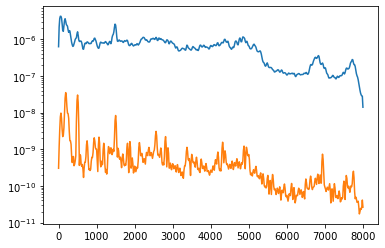

In [143]:
f, Py = scipy.signal.welch(y,
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
f, Pre = scipy.signal.welch(re,
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
plt.plot(f,Py)
plt.plot(f,Pre)
plt.yscale('log')

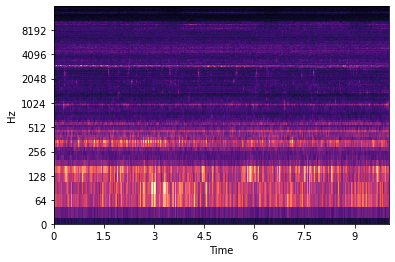

In [144]:
rec = librosa.segment.recurrence_matrix(S, mode='connectivity',
                                         metric='cosine', sparse=True)
nlm2 = librosa.decompose.nn_filter(S, rec=rec,
                                          aggregate=np.average)
librosa.display.specshow(nlm2, x_axis='time', y_axis='log',sr=sr*2)

In [145]:
re2 = librosa.core.istft(nlm2)

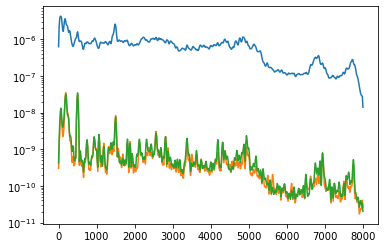

In [146]:
f, Pre2 = scipy.signal.welch(re2,
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
plt.plot(f,Py)
plt.plot(f,Pre)
plt.plot(f,Pre2)
plt.yscale('log')

In [ ]:
#https://timsainburg.com/noise-reduction-python.html